In [1]:
import os
import re

# Get the size of the largest network (by number of seeds) from each time.dat file

# Directory containing your .dat files
directory = "..."
# Define the directory where you want to save the output file
script_directory = "..."

# Dictionary to store time and largest number pairs
time_and_largest = {}

# Regular expression pattern to match the time value
time_pattern = r"sim_1_simtime_([-+]?\d*\.?\d+(?:[eE][-+]?\d+)?)"

# Iterate through the files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".dat"):
        # Use regular expression to extract the time value
        time_match = re.search(time_pattern, filename)
        if time_match:
            try:
                time = float(time_match.group(1))
                
                # Read the file and find the largest number
                file_path = os.path.join(directory, filename)
                with open(file_path, "r") as file:
                    numbers = [float(line.strip()) for line in file]
                    largest = max(numbers)
                    
                    # Convert simulation time to real time (Calculation in SI) and store time and largest number as a pair
                    time *= 4.32e7 / 3600  # Adjusted for hours
                    time_and_largest[time] = largest
            except (ValueError, FileNotFoundError):
                pass

# Sort the time values
sorted_times = sorted(time_and_largest.keys())

# Create a new .dat file in the script directory to store the sorted time and largest number pairs
output_filename = os.path.join(script_directory, "sorted_time_and_largest.dat")
with open(output_filename, "w") as output_file:
    for time in sorted_times:
        largest = time_and_largest[time]
        output_file.write(f"{time}\t{largest}\n")

print(f"Sorted time and largest numbers have been saved to {output_filename}")


Sorted time and largest numbers have been saved to /Users/jessica/Library/CloudStorage/OneDrive-JohnsHopkins/Yanqi/Manuscripts/2022_network paper/Simulation files_7_2_v1/Figure 6 09_18_23/sorted_time_and_largest.dat


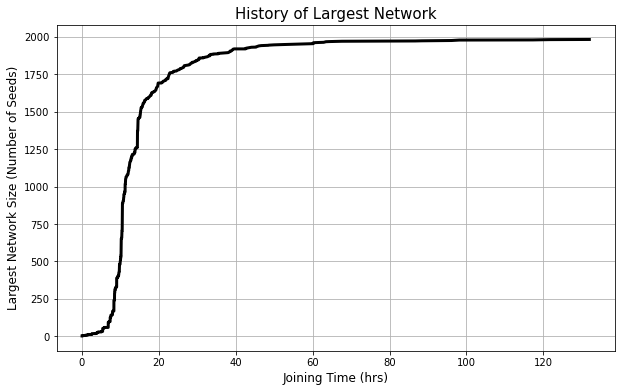

In [2]:
import matplotlib.pyplot as plt

# Load data from the sorted_time_and_largest.dat file
data_file = "/.../sorted_time_and_largest.dat/"
times = []
largest_numbers = []

with open(data_file, "r") as file:
    for line in file:
        time, largest = map(float, line.strip().split())
        times.append(time)
        largest_numbers.append(largest)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(times, largest_numbers, linewidth = 3, color = '0')
plt.xlabel("Joining Time (hrs)", fontsize = 12)
plt.ylabel("Largest Network Size (Number of Seeds)", fontsize = 12)
plt.title("History of Largest Network", fontsize = 15)
plt.grid(True)

# Show the plot
plt.savefig('largest_network_tracking_full_scale')
plt.show()


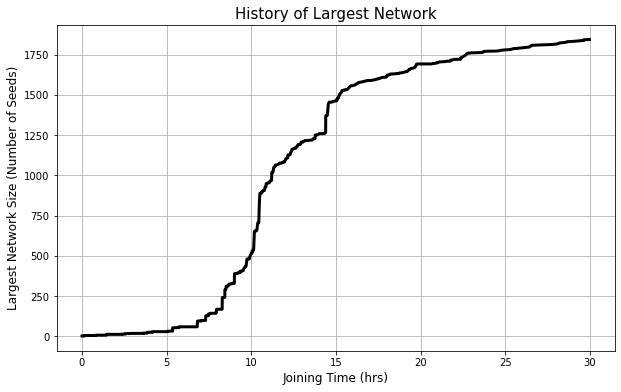

In [3]:
# A detailed zoom-in figure within the range of 0 to 120
import matplotlib.pyplot as plt

# Load data from the sorted_time_and_largest.dat file
data_file = ".../sorted_time_and_largest.dat"
times = []
largest_numbers = []

with open(data_file, "r") as file:
    for line in file:
        time, largest = map(float, line.strip().split())
        if time < 30:  # Filter data for time < 30
            times.append(time)
            largest_numbers.append(largest)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(times, largest_numbers, linewidth = 3, color = '0')
plt.xlabel("Joining Time (hrs)", fontsize = 12)
plt.ylabel("Largest Network Size (Number of Seeds)", fontsize = 12)
plt.title("History of Largest Network", fontsize = 15)
plt.grid(True)


# Show the plot
plt.savefig('largest_network_tracking_30')
plt.show()

